Import Pandas to load the dataset

In [3]:
import pandas as pd

Load the datasets

In [5]:
#load train.csv (training dataset)
train = pd.read_csv("https://raw.githubusercontent.com/aana0308/ML-Lab-Linear-Regression/main/data/train.csv")
train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
#load test.csv (testing dataset)
test = pd.read_csv("https://raw.githubusercontent.com/aana0308/ML-Lab-Linear-Regression/main/data/test.csv")
test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


Getting information on data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


Getting statistical information on the dataset

In [10]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [11]:
test.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


Checking for NULL values

In [12]:
train.isna().sum()

x    0
y    1
dtype: int64

In [13]:
test.isna().sum()

x    0
y    0
dtype: int64

As we can see there is one row with a NULL value in the train dataset. To improve the accuracy of our model we will drop the row with the NULL value.

In [15]:
train = train.dropna()
train.isna().sum()

x    0
y    0
dtype: int64

Normalising the data

In [23]:
#import the required python libraries
from sklearn import preprocessing
import numpy as np

In [34]:
#convert the x,y columns in dataframe into arrays
x_array = np.array(train['x'])
y_array = np.array(train['y'])

In [35]:
#use normalize() function to normalize data in the arrays obtained from above
x_normalized = preprocessing.normalize([x_array]).reshape(-1,1)
y_normalized = preprocessing.normalize([y_array]).reshape(-1,1)

In [38]:
#convert normalized array into a dataframe
train_normalized = pd.DataFrame(x_normalized, columns = ['x'])
train_normalized['y'] = y_normalized
train_normalized

,x,y
0,0.015711,0.014103
1,0.032730,0.031063
2,0.009819,0.011269
3,0.024875,0.023944
4,0.056951,0.057127
...,...,...
694,0.037967,0.038348
695,0.060878,0.061928
696,0.053678,0.057987
697,0.043204,0.041655


Visualise the normal distribution of data after normalization

In [39]:
#load the required python libraries
import seaborn as sns

C:\Users\aanak\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

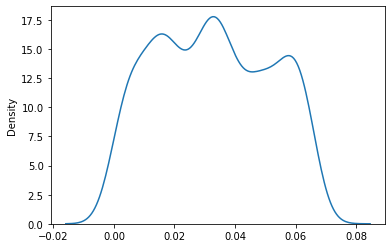

In [42]:
sns.distplot(train_normalized, hist=False)

Visualising the data points using a scatter plot

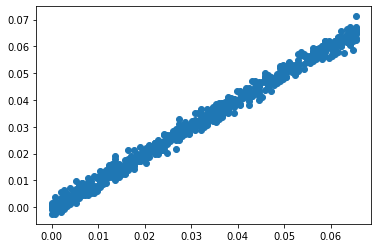

In [44]:
#import the required python libraries
import matplotlib.pyplot as plt

#use scatter() function to make a scatter plot
plt.scatter(train_normalized['x'],train_normalized['y'])
plt.show()


Modelling using Linear Regression

In [45]:
#making class LinearRegression() to perform the functions of linear regression
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W ) + self.b